## LAB 3 

### Duolong and Petit law

If $C_v$ is the **molar heat capacity** or **specific heat capacity**,
$$
{C_v \over 3R} = 1
$$

### Einstein's model for heat capacity of solids.
Einstein temprature: $\theta_E = {h \nu_E \over k}$
$$
{C_v \over 3R} = \left(\frac{\theta_E}{T}\right)^2 \frac{e^{\theta_E/T}}{\left(e^{\theta_E/T}-1\right)^2}
$$

### Debye's model for heat capacity of solids.
Einstein temprature: $\theta_D = {h \nu_D \over k}$

$$
\begin{align} 
U=\int d\omega D(\omega) n(\omega)\hbar\omega=\int_{0}^{\omega_{D}}d\omega\dfrac{V\omega^{2}}{2\pi^{2}\upsilon_{s}^{3}}\dfrac{\hbar\omega}{e^{\hbar\omega/k_{B}T}-1} 
\end{align}
$$ 

$$
{C_v \over 3R} = \left(\frac{\theta_D}{T}\right)^2 \frac{e^{\theta_D/T}}{\left(e^{\theta_D/T}-1\right)}
$$



In [105]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
plt.style.use("bmh")


In [106]:
#Dulong and petit
x_range = np.linspace(1e-10,500,2000)
cv_dp = np.ones(x_range.shape)

In [126]:
#Einstein's model
nu = np.linspace(0,2,301)
x = x_range
thetaE = 240
cv_e = lambda x: (thetaE/x)**2*(np.exp(thetaE/x)/(np.exp(thetaE/x)-1)**2)

def G_e(nu):
    z = np.zeros(nu.shape)
    z[nu==1.0] = 1.0
    return z

#cv_e = (1/x)**2*(np.exp(1/x)/(np.exp(1/x)-1)**2)

In [136]:
#Debye Model
def cv_d(T):
    thetaD = 200
    x = thetaD/T
    return (-3*(x)/(np.exp(x)-1)+12/x**3*np.vectorize(quad)(lambda x: x**3/(np.exp(x)-1),0,x)[0])

def G_d(nu):
    return 0.6*nu**2


/tmp/ipykernel_3968/2053690108.py:5: RuntimeWarning: overflow encountered in exp
  cv_e = lambda x: (thetaE/x)**2*(np.exp(thetaE/x)/(np.exp(thetaE/x)-1)**2)
/tmp/ipykernel_3968/2053690108.py:5: RuntimeWarning: overflow encountered in square
  cv_e = lambda x: (thetaE/x)**2*(np.exp(thetaE/x)/(np.exp(thetaE/x)-1)**2)
/tmp/ipykernel_3968/2053690108.py:5: RuntimeWarning: invalid value encountered in true_divide
  cv_e = lambda x: (thetaE/x)**2*(np.exp(thetaE/x)/(np.exp(thetaE/x)-1)**2)
/tmp/ipykernel_3968/1308037917.py:5: RuntimeWarning: overflow encountered in exp
  return (-3*(x)/(np.exp(x)-1)+12/x**3*np.vectorize(quad)(lambda x: x**3/(np.exp(x)-1),0,x)[0])


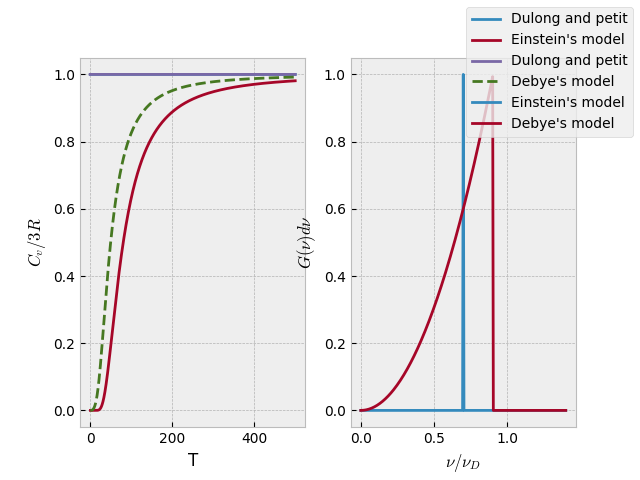

In [137]:
fig, (ax1,ax2) = plt.subplots(1,2)
c = 240/343
ax1.plot(x_range,cv_dp,label="Dulong and petit")
ax1.plot(x_range,cv_e(x_range),label="Einstein's model")
ax1.plot(x_range,cv_dp,label="Dulong and petit")
ax1.plot(x_range,cv_d(x_range),label="Debye's model",ls="--")

density_debye = G_d(nu)
density_debye[density_debye>1] = 0
ax2.plot(nu*c,G_e(nu),label="Einstein's model")
ax2.plot(nu*c,density_debye,label="Debye's model")

ax1.set_xlabel("T");ax1.set_ylabel(r"${C_v/3R}$")
ax2.set_xlabel(r"$\nu/\nu_D$");ax2.set_ylabel(r"$G(\nu)d\nu$")
fig.legend()
plt.show()